## Classification Metrics: FPR and TPR
### False Positive Rate (FPR)
FPR = FP / N = FP / (FP + TN)

FP (False Positives): Actual negatives predicted as positive

TN (True Negatives): Actual negatives predicted correctly

N: Total number of actual negatives
[ N = FP + TN ]

FPR answers:

"Out of all actual negatives, how many were incorrectly predicted as positive?"

#### True Positive Rate (TPR) / Sensitivity / Recall
TPR = TP / P = TP / (TP + FN) = 1 - FNR

TP (True Positives): Actual positives predicted correctly

FN (False Negatives): Actual positives predicted as negative

P: Total number of actual positives
[ P = TP + FN ]

TPR answers:

"Out of all actual positives, how many were correctly predicted?"

## ROC Curve Summary
X-axis: FPR

Y-axis: TPR

The ROC Curve helps visualize classifier performance across different threshold values. A good model has a curve that bows towards the top-left corner.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [2]:
x,y=make_classification(n_samples=1000,n_classes=2,random_state=42)

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [4]:
dumy_model_prob=[0 for _ in range(len(y_test))]
dumy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
model_prob=model.predict_proba(x_test)

In [13]:
model_prob=model_prob[:, 1]

In [15]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dumy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9244444444444444


In [16]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dumy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [17]:
thresholds

array([       inf, 0.99980998, 0.93487186, 0.93304963, 0.90661707,
       0.90270865, 0.88943935, 0.8842701 , 0.88033334, 0.87756048,
       0.87733707, 0.87666331, 0.87003757, 0.86989515, 0.74475994,
       0.7411032 , 0.68654623, 0.67674442, 0.55870766, 0.54573916,
       0.52278008, 0.52167944, 0.49408456, 0.49263798, 0.49146748,
       0.48716764, 0.47658739, 0.46717791, 0.4358776 , 0.41370393,
       0.40937279, 0.40803654, 0.40557588, 0.40480122, 0.39601809,
       0.35672488, 0.35446702, 0.33723408, 0.33508229, 0.29094555,
       0.28263878, 0.27229494, 0.24994703, 0.2174457 , 0.21580504,
       0.21063907, 0.20517504, 0.18531474, 0.17434143, 0.13957697,
       0.13734422, 0.13605737, 0.12836111, 0.11488762, 0.11072312,
       0.10730045, 0.10371018, 0.05088178, 0.04834851, 0.01377753,
       0.00777042, 0.00301175])

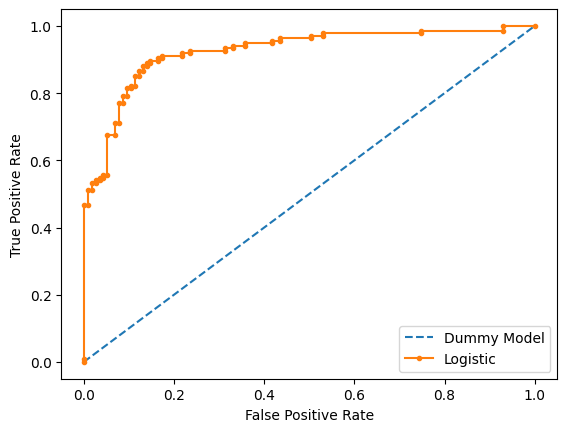

In [18]:
# plot the roc curve for the model
import seaborn as sns
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

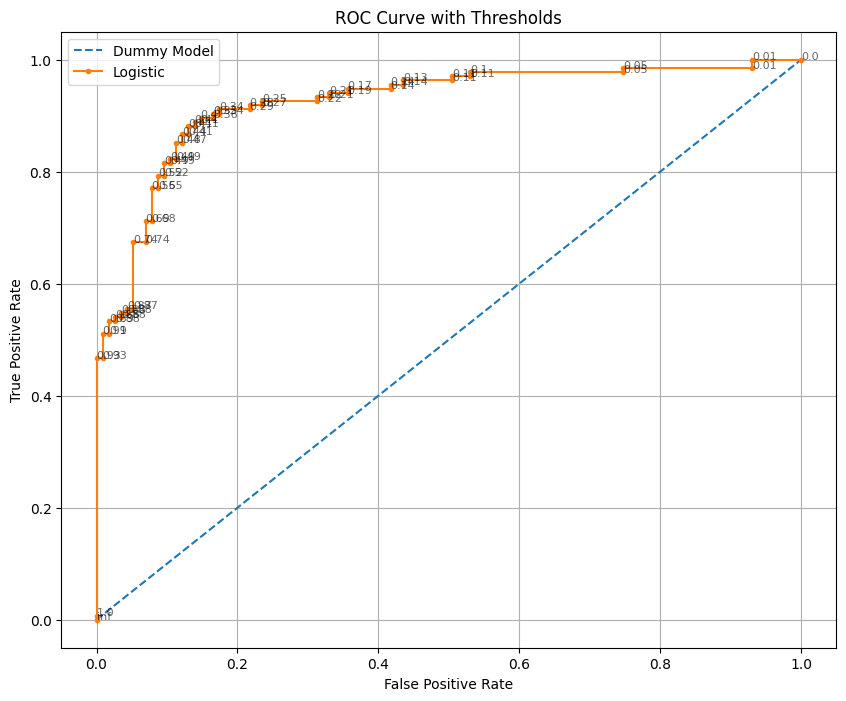

In [19]:
import numpy as np

# Set up the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Plot ROC curves
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate thresholds on ROC curve
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', xy=(fpr, tpr), fontsize=8, alpha=0.6)

# Axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()